In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras import Sequential

from tensorflow.keras.models import Model

from tensorflow.keras.layers import UpSampling2D, MaxPooling2D, Flatten
import cv2
import os
import random
from tqdm import tqdm
import numpy as np
from keras.preprocessing import image
import os
import random
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, LSTM, Bidirectional
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import BatchNormalization, Embedding
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import keras
import pandas
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow import expand_dims
import gc
from keras import Sequential
from keras.layers import Dense, Flatten
from numpy.linalg import norm
from keras.initializers import Constant
# from keras.utils import load_img
# from keras.utils import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
from keras.applications.vgg19 import VGG19

from keras.models import Model

2024-01-05 23:15:18.817051: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-05 23:15:19.086039: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 23:15:19.086092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 23:15:19.136039: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 23:15:19.246777: I tensorflow/core/platform/cpu_feature_guar

In [2]:
print(len(tf.config.list_physical_devices('GPU'))>0)

True


2024-01-05 23:15:22.048464: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 23:15:22.349878: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 23:15:22.349930: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
import torch
print(f'PyTorch version: {torch.__version__}')
print('*'*10)
print(f'_CUDA version: ')
!nvcc --version
print('*'*10)
print(f'CUDNN version: {torch.backends.cudnn.version()}')
print(f'Available GPU devices: {torch.cuda.device_count()}')
print(f'Device Name: {torch.cuda.get_device_name()}')
torch.cuda.is_available()

PyTorch version: 2.1.2+cu121
**********
_CUDA version: 
/bin/bash: line 1: nvcc: command not found
**********
CUDNN version: 8902
Available GPU devices: 1
Device Name: NVIDIA GeForce RTX 4050 Laptop GPU


True

In [4]:
conv_base = VGG19(include_top=False, weights='imagenet', input_shape=(224,224, 3), pooling='avg')

2024-01-05 17:57:37.464874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 17:57:37.464994: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 17:57:37.465013: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 17:57:37.671784: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 17:57:37.671857: I external/local_xla/xla/stream_executor

In [5]:
conv_base.trainable = False

In [6]:
model_vgg = Sequential()
model_vgg.add(conv_base)
model_vgg.add(Flatten())

In [7]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
Total params: 20024384 (76.39 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [8]:
def get_data(folder_path):
#         print(folder_path)
    try:
                img = image.load_img(folder_path, target_size=(224, 224, 3))
                img_array = image.img_to_array(img)
#                 expanded_img = np.expand_dims(img_array, axis=0)
                preprocessed_input = preprocess_input(img_array)
#                 img_array /= 255.
                return preprocessed_input
    except:
        oov.append(folder_path)

In [9]:
images = []
array_insta_images = []
!pip install tqdm
oov = []
from tqdm import tqdm

In [10]:
for file in tqdm(os.listdir('images_insta_final')):

     if get_data(os.path.join('images_insta_final', file)) is not None:
            array_insta_images.append(get_data(os.path.join('images_insta_final', file)))
    

100%|███████████████████████████████████████████████████████████████████████████████| 6311/6311 [02:32<00:00, 41.29it/s]


In [11]:
len(array_insta_images)

# print(array_insta_images)

6310

In [12]:
type(array_insta_images)

list

In [14]:
import gc
gc.collect()

0

In [ ]:
# array_insta_images[0][1]
array_insta_images = np.array(array_insta_images)

In [ ]:
array_insta_images = array_insta_images.astype('int32')

In [15]:
array_insta_images.dtype


AttributeError: 'list' object has no attribute 'dtype'

In [ ]:
import pickle
array_insta_images = pickle.load(open('insta-images-combined-version-2-array.pkl', 'rb'))

In [16]:
len(oov)

1

In [17]:
oov

['images_insta_final/.ipynb_checkpoints']

In [194]:
# # oov
# import pickle
# pickle.dump(oov, open("re-download-data.pkl", "wb"))

In [195]:
# int(oov[0].split("/")[-1].split("_")[1].split(".")[0])

In [196]:
# import requests
# oov_images = []
# for i in tqdm(range(209, len(oov))):
# #     print(i)
#     if oov[i].split("/")[-1].split("_")[1].split(".")[0] != 'checkpoints':
#         with open("/kaggle/working/images_{}.png".format(int(oov[i].split("/")[-1].split("_")[1].split(".")[0])), 'wb') as f:
#                 url = df.iloc[int(oov[i].split("/")[-1].split("_")[1].split(".")[0])][1]
#                 data = requests.get(url)
#                 f.write(data.content)
# #     except:
# #         oov_images.append("/kaggle/working/images_{}".format(int(oov[i].split("/")[-1].split("_")[1].split(".")[0])))
    

In [197]:
# !zip -r new_images.zip 

In [212]:
import pandas as pd
df = pd.read_csv("/kaggle/input/preprocessed-insta-data-version-2/preprocessed_data_instagram_posts_version_2.csv")

In [213]:
df.head()

,caption,displayUrl,hashtags,likesCount,combined_text
0,Views from Conic hill on a blue bird day ☀️ \n...,https://instagram.fadb7-1.fna.fbcdn.net/v/t51....,scottishhighlands welivetoexplore lovescotland...,145.0,view conic hill blue bird day sun ️ ...
1,Today we went down into the forest and picked ...,https://scontent-sea1-1.cdninstagram.com/v/t51...,northumberlandnationalpark forestryengland for...,135.0,today go forest pick year christmas tree Ch...
2,Throwback to this gorgeous morning over Ullswa...,https://instagram.fjnb2-1.fna.fbcdn.net/v/t51....,lakedistrict thelakedistrict cumbria welivetoe...,196.0,throwback gorgeous morning ullswater fresh dus...
3,Fog making for some whimsical forest wanders ✨...,https://scontent-zrh1-1.cdninstagram.com/v/t51...,lakedistrict forestryengland whinlatter folkgr...,172.0,fog make whimsical forest wander sparkle ...
4,Just back from a glorious few days in the Tros...,https://instagram.fruh2-1.fna.fbcdn.net/v/t51....,neverstopexploring everydaylifeoutdoors explor...,200.0,back glorious day trossachs explore eat pie...


In [214]:
df.drop(df.tail(1).index,inplace=True)

In [215]:
df.shape

(6310, 5)

In [216]:
df['combined_text'][1]


'today go forest pick year christmas tree    Christmas tree    obviously bring home jeep snow    snowman without snow    ️            northumberlandnationalpark britain northumberlandnationalpark forestryengland forestroad adventureisoutthere thediscoverer earthmagic earthfocus forestphotography hamsterley visitengland visitbritain everydaylifeoutdoor wanderlust neverstopexplore explorebritain    jeepuk jeep jeeplife jeepcherokee jeepxj folkgreen folknature welivetoexplore christmas2023 christmastree'

In [217]:
df['tags'] = None
data = []
corpus = []

In [218]:
def split_data(text):
    data.append(text.split(" "))

In [219]:


def make_corpus(data):
    corpus.append(data)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310 entries, 0 to 6309
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   caption        6310 non-null   object 
 1   displayUrl     6310 non-null   object 
 2   hashtags       6310 non-null   object 
 3   likesCount     6310 non-null   float64
 4   combined_text  6310 non-null   object 
 5   tags           0 non-null      object 
dtypes: float64(1), object(5)
memory usage: 295.9+ KB


In [221]:
df['tags'] = df['combined_text']

In [222]:
df.isnull().sum()

caption          0
displayUrl       0
hashtags         0
likesCount       0
combined_text    0
tags             0
dtype: int64

In [223]:
# df.dropna(axis=0, inplace=True)

In [224]:
df.shape
# 

(6310, 6)

In [225]:
#removing respective images and making the no of images samr

In [226]:
import random


In [227]:
!pip install textacy

In [228]:
df.head()

,caption,displayUrl,hashtags,likesCount,combined_text,tags
0,Views from Conic hill on a blue bird day ☀️ \n...,https://instagram.fadb7-1.fna.fbcdn.net/v/t51....,scottishhighlands welivetoexplore lovescotland...,145.0,view conic hill blue bird day sun ️ ...,view conic hill blue bird day sun ️ ...
1,Today we went down into the forest and picked ...,https://scontent-sea1-1.cdninstagram.com/v/t51...,northumberlandnationalpark forestryengland for...,135.0,today go forest pick year christmas tree Ch...,today go forest pick year christmas tree Ch...
2,Throwback to this gorgeous morning over Ullswa...,https://instagram.fjnb2-1.fna.fbcdn.net/v/t51....,lakedistrict thelakedistrict cumbria welivetoe...,196.0,throwback gorgeous morning ullswater fresh dus...,throwback gorgeous morning ullswater fresh dus...
3,Fog making for some whimsical forest wanders ✨...,https://scontent-zrh1-1.cdninstagram.com/v/t51...,lakedistrict forestryengland whinlatter folkgr...,172.0,fog make whimsical forest wander sparkle ...,fog make whimsical forest wander sparkle ...
4,Just back from a glorious few days in the Tros...,https://instagram.fruh2-1.fna.fbcdn.net/v/t51....,neverstopexploring everydaylifeoutdoors explor...,200.0,back glorious day trossachs explore eat pie...,back glorious day trossachs explore eat pie...


In [229]:
import textacy
from textacy import preprocessing

In [230]:
def clean_text_split_data(data):
    cleaned = preprocessing.normalize.whitespace(data)
    return cleaned

In [231]:
new_data = []

df['tags'] = df['tags'].apply(clean_text_split_data)

In [232]:
df['tags']

0       view conic hill blue bird day sun ️ scottishhi...
1       today go forest pick year christmas tree Chris...
2       throwback gorgeous morning ullswater fresh dus...
3       fog make whimsical forest wander sparkle laked...
4       back glorious day trossachs explore eat pie wa...
                              ...                        
6305    03 11 2018 mastenbo kapellen belgium plogge tr...
6306    12 01 2017 mastenbo kapellen belgium plogge tr...
6307    30 01 2018 mastenbo kapellen belgium plogge tr...
6308    20 12 2019 mastenbo kapellen belgium plogge tr...
6309    12 01 2017 mastenbo kapellen belgium plogge tr...
Name: tags, Length: 6310, dtype: object

In [233]:
df['tags_2'] = df['tags']

In [234]:
df['tags'] = df['tags'].apply(split_data)

In [235]:
data[0]

['view',
 'conic',
 'hill',
 'blue',
 'bird',
 'day',
 'sun',
 '️',
 'scottishhighland',
 'scotland',
 'scottishhighland',
 'welivetoexplore',
 'lovescotland',
 'trossachs',
 'visitscotland',
 'exploremore',
 'scotland',
 'thediscoverer',
 'earthfocus',
 'earthoutdoor',
 'neverstopexplore',
 'scotlandexplore',
 'hiddenscotland',
 'welivetodiscover',
 'conichill',
 'lovesscotland',
 'exploreeverything',
 'scotlandtravel']

In [236]:
data[0]

['view',
 'conic',
 'hill',
 'blue',
 'bird',
 'day',
 'sun',
 '️',
 'scottishhighland',
 'scotland',
 'scottishhighland',
 'welivetoexplore',
 'lovescotland',
 'trossachs',
 'visitscotland',
 'exploremore',
 'scotland',
 'thediscoverer',
 'earthfocus',
 'earthoutdoor',
 'neverstopexplore',
 'scotlandexplore',
 'hiddenscotland',
 'welivetodiscover',
 'conichill',
 'lovesscotland',
 'exploreeverything',
 'scotlandtravel']

In [237]:
make_corpus(data)

In [238]:
len(corpus[0])

6310

In [239]:
corpus[0][0]

['view',
 'conic',
 'hill',
 'blue',
 'bird',
 'day',
 'sun',
 '️',
 'scottishhighland',
 'scotland',
 'scottishhighland',
 'welivetoexplore',
 'lovescotland',
 'trossachs',
 'visitscotland',
 'exploremore',
 'scotland',
 'thediscoverer',
 'earthfocus',
 'earthoutdoor',
 'neverstopexplore',
 'scotlandexplore',
 'hiddenscotland',
 'welivetodiscover',
 'conichill',
 'lovesscotland',
 'exploreeverything',
 'scotlandtravel']

In [1]:
from gensim.models import FastText

In [241]:
model4 = FastText(vector_size=512, window=10, min_count=1, hs=1, sg=0)

In [242]:
model4.build_vocab(corpus_iterable=data) 

In [243]:
total_words = model4.corpus_total_words

In [244]:
model4.train(corpus_iterable=data, total_words=total_words, epochs=100)

(31915652, 34082800)

In [3]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("saved_fasttext_model")

In [249]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("fasttext.model")
model4.save(fname)

# model = FastText.load(fname)

In [254]:
model4.save('saved_fasttext_model')

In [4]:
# model = FastText.load(fname)
model = FastText.load('saved_fasttext_model')

In [5]:
model.wv.most_similar('like')

[('alike', 0.5782839059829712),
 ('liked', 0.5333564281463623),
 ('likesforlike', 0.42753514647483826),
 ('dreamlike', 0.37987831234931946),
 ('unlike', 0.36403408646583557),
 ('vike', 0.3431723713874817),
 ('forward', 0.30891838669776917),
 ('pike', 0.3065967559814453),
 ('likely', 0.2712731659412384),
 ('isolated', 0.2626681625843048)]

In [246]:
vocab = model4.wv.index_to_key
# vocab = list(vocab.wv.index_to_key_list())

In [107]:
len(vocab)

18800

In [108]:
# vocab

In [109]:
maxlen=-1
for i in data:
    if len(i) > maxlen:
        maxlen = len(i)
        

In [110]:
maxlen

333

In [111]:
from keras.preprocessing.text import one_hot,Tokenizer
tok = Tokenizer()

In [112]:
df.isnull().sum()

caption             0
displayUrl          0
hashtags            0
likesCount          0
combined_text       0
tags             6311
tags_2              0
dtype: int64

In [117]:
df.head()

,caption,displayUrl,hashtags,likesCount,combined_text,tags,tags_2
0,Views from Conic hill on a blue bird day ☀️ \n...,https://instagram.fadb7-1.fna.fbcdn.net/v/t51....,scottishhighlands welivetoexplore lovescotland...,145.0,view conic hill blue bird day sun ️ ...,None,view conic hill blue bird day sun ️ scottishhi...
1,Today we went down into the forest and picked ...,https://scontent-sea1-1.cdninstagram.com/v/t51...,northumberlandnationalpark forestryengland for...,135.0,today go forest pick year christmas tree Ch...,None,today go forest pick year christmas tree Chris...
2,Throwback to this gorgeous morning over Ullswa...,https://instagram.fjnb2-1.fna.fbcdn.net/v/t51....,lakedistrict thelakedistrict cumbria welivetoe...,196.0,throwback gorgeous morning ullswater fresh dus...,None,throwback gorgeous morning ullswater fresh dus...
3,Fog making for some whimsical forest wanders ✨...,https://scontent-zrh1-1.cdninstagram.com/v/t51...,lakedistrict forestryengland whinlatter folkgr...,172.0,fog make whimsical forest wander sparkle ...,None,fog make whimsical forest wander sparkle laked...
4,Just back from a glorious few days in the Tros...,https://instagram.fruh2-1.fna.fbcdn.net/v/t51....,neverstopexploring everydaylifeoutdoors explor...,200.0,back glorious day trossachs explore eat pie...,None,back glorious day trossachs explore eat pie wa...


In [118]:
tok.fit_on_texts(df['tags_2'])


In [119]:
vocab_size = len(tok.word_index) + 1

In [120]:
encd_revs = tok.texts_to_sequences(df['tags_2'])

In [121]:
from keras.preprocessing.sequence import pad_sequences


In [122]:
pad_revs = pad_sequences(encd_revs, maxlen=maxlen, padding='post')

In [123]:
pad_revs[0]

array([  570, 12998,   336,   701,   850,    32,   428,    33,  2368,
         439,  2368,   393,  4403,  2178,   385,    68,   439,   724,
         210,  2834,   266,  1190,   919,  4745, 12999,  8952,   702,
        6007,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [125]:
embd_dims =  512

In [126]:
word_vec_dict = {}

for word in vocab:
    word_vec_dict[word] = model4.wv.get_vector(word)

In [127]:
embd_matrix = np.zeros(shape=(vocab_size, embd_dims))
for word, i in tok.word_index.items():
    if word in vocab:
        embd = word_vec_dict[word]
        if embd is not None:
            embd_matrix[i]=embd

In [128]:
model_lstm=Sequential()
model_lstm.add(Embedding(input_dim=vocab_size,output_dim=embd_dims,input_length=maxlen,embeddings_initializer=Constant(embd_matrix)))
model_lstm.add(Bidirectional(LSTM(100, return_sequences=True)))
model_lstm.add(Bidirectional(LSTM(100)))
model_lstm.add(Flatten())
# model.add(Dense(128))
# model.add(Dense())

In [129]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 333, 512)          9621504   
                                                                 
 bidirectional (Bidirection  (None, 333, 200)          490400    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               240800    
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
Total params: 10352704 (39.49 MB)
Trainable params: 10352704 (39.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/tmp/ipykernel_42/2612341092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['likesCount'], kde=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


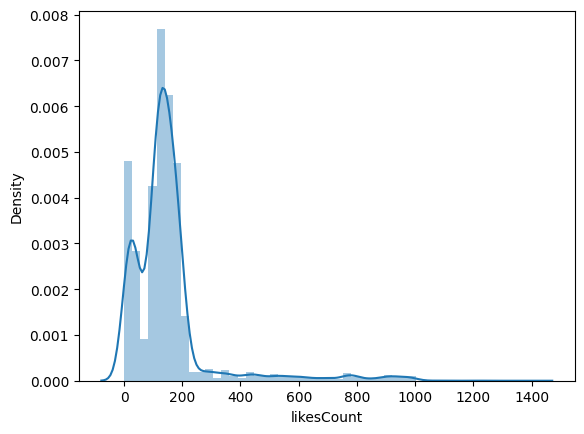

In [147]:
import seaborn as sns
sns.distplot(df['likesCount'], kde=True)
score = df['likesCount']

In [140]:
# import seaborn as sns
# sns.distplot(score['likesCount'], kde=True)

In [141]:
score.shape

(6311,)

In [142]:
from sklearn.preprocessing import PowerTransformer

In [143]:
pt_trnf = PowerTransformer()

In [144]:
score_trnf = pt_trnf.fit_transform(score.values.reshape(-1,1))

In [145]:
len(score_trnf)

6311

In [146]:
# images_without_index = []
# for i in array_insta_images:
#     images_without_index.append(i[0])

In [81]:
# len(images_without_index)

In [148]:
score_trnf

array([[ 0.28398631],
       [ 0.19974448],
       [ 0.65434659],
       ...,
       [-1.77229136],
       [-1.06663779],
       [-0.87917258]])

In [149]:
score_trnf.dtype

dtype('float64')

In [150]:
# score = np.array(score)

In [151]:
# import seaborn as sns
# sns.distplot(score_trnf, kde=True)

In [152]:
#Extract image names and their index positions sep acc to train and test split
len(pad_revs)

6311

In [153]:
# y = df['likesCount']

In [154]:
# from sklearn.model_selection import train_test_split

In [155]:
# X_train, y_train, X_test, y_test = train_test_split(pad_revs, y, test_size=0.2, random_state=0)

In [156]:
# resnet_input = Input(shape=(224,224,3))
# lstm_input = Input(shape=(maxlen,))
# # shoes_input = Input(shape=(128,128,3), name='shoes_input')

# # Connect the existing models to the new Input layers
# # outwear_layer = model_outwear(outwear_input)
# # pants_layer = model_pants(pants_input)
# # shoes_layer = model_shoes(shoes_input)
# resnet_layer = model_resnet(resnet_input)
# lstm_layer = model_lstm(lstm_input)

In [157]:
# type(score)

In [158]:
# score = np.array(score)

In [159]:
# score = score.astype('int32')

In [172]:
score.dtype

dtype('float64')

In [161]:
# score


In [162]:
combinedInput = concatenate([model_vgg.output, model_lstm.output])

In [163]:
x = Flatten()(combinedInput)
x = Dense(1024, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='linear')(x)

In [164]:
from tensorflow.keras.callbacks import EarlyStopping

In [165]:
model = Model(inputs=[model_vgg.input, model_lstm.input], outputs=x)

In [166]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[keras.metrics.MeanSquaredError()])

In [167]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [168]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 embedding_input (InputLaye  [(None, 333)]                0         []                            
 r)                                                                                               
                                                                                                  
 embedding (Embedding)       (None, 333, 512)             9621504   ['embedding_input[0][0]']     
                                                                                                  
 vgg19_input (InputLayer)    [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 333, 200)             490400    ['embedding[0][0]']       

In [169]:
# array_insta_images = np.array(array_insta_images)
# array_insta_images[0][0]

In [170]:
# images_without_index[0][0][0]
array_insta_images[0]

array([[[116, 103,  96],
        [116, 103,  96],
        [117, 104,  97],
        ...,
        [  4,   8,  28],
        [  4,   8,  22],
        [-38, -34, -20]],

       [[116, 103,  96],
        [116, 103,  96],
        [116, 103,  96],
        ...,
        [ 52,  63,  74],
        [ 35,  51,  59],
        [ 21,  37,  45]],

       [[116, 103,  96],
        [116, 103,  96],
        [116, 103,  96],
        ...,
        [-40, -29, -12],
        [  6,  19,  28],
        [-29, -16,  -7]],

       ...,

       [[ 56,  44,  51],
        [ 91,  82,  86],
        [ 91,  84,  84],
        ...,
        [ 44,  57,  67],
        [ 42,  64,  71],
        [ 11,  33,  40]],

       [[ 62,  59,  70],
        [ 86,  80,  90],
        [ 65,  57,  65],
        ...,
        [ 78,  81,  87],
        [ 73,  77,  89],
        [ 71,  75,  87]],

       [[ 50,  53,  58],
        [ 54,  56,  58],
        [ 61,  57,  59],
        ...,
        [ 58,  74,  76],
        [ 46,  57,  70],
        [ 54,  64,  79]]

In [171]:
len(array_insta_images)

6310

In [106]:
pad_revs[0]

array([  491, 11068,   276,   593,   779,     9,   363,     6,  2054,
         359,  2054,   321,  3909,  1885,   311,    34,   359,   586,
         163,  2472,   209,  1009,   769,  4190, 11069,  7877,   569,
        5312,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [107]:
pad_revs.dtype

dtype('int32')

In [173]:
len(pad_revs)

6311

In [176]:
pad_revs.delete

AttributeError: 'numpy.ndarray' object has no attribute 'delete'

In [109]:
len(score)

4611

In [110]:
pad_revs = pad_revs.astype('float32')

In [111]:
pad_revs

array([[4.9100e+02, 1.1068e+04, 2.7600e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.1000e+01, 2.5000e+01, 1.5500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.9500e+02, 9.3500e+02, 1.0600e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.1280e+03, 1.0460e+03, 1.8400e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.2000e+01, 1.4110e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.5000e+01, 7.0400e+02, 9.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], dtype=float32)

In [112]:
model.fit(x=[array_insta_images,pad_revs], y=score, shuffle=True, validation_split=0.2, epochs=60)

Epoch 1/60
116/116 [==============================] - 78s 492ms/step - loss: 0.8488 - mean_squared_error: 1.6722 - val_loss: 0.8700 - val_mean_squared_error: 1.3084
Epoch 2/60
116/116 [==============================] - 47s 401ms/step - loss: 0.7117 - mean_squared_error: 0.9150 - val_loss: 0.8156 - val_mean_squared_error: 1.1886
Epoch 3/60
116/116 [==============================] - 41s 350ms/step - loss: 0.6638 - mean_squared_error: 0.8011 - val_loss: 0.8843 - val_mean_squared_error: 1.4604
Epoch 4/60
116/116 [==============================] - 39s 339ms/step - loss: 0.6052 - mean_squared_error: 0.7578 - val_loss: 0.7966 - val_mean_squared_error: 1.1062
Epoch 5/60
116/116 [==============================] - 37s 319ms/step - loss: 0.5095 - mean_squared_error: 0.5568 - val_loss: 0.7945 - val_mean_squared_error: 1.1110
Epoch 6/60
116/116 [==============================] - 36s 311ms/step - loss: 0.4579 - mean_squared_error: 0.4559 - val_loss: 0.8620 - val_mean_squared_error: 1.2588
Epoch 7/60

In [152]:
model.save('post-scorer.keras')

In [ ]:
#Prdictions